## Regression

Algorithms: Linear Regression, Decision Tree Regressor, Random Forest Regressor, Polynomial
Regression, Linear Regression Lasso, Linear Regression Ridge, Linear Regression Elastic Net,
Polynomial Regression Lasso, Polynomial Regression Ridge and Polynomial Regression Elastic Net


Performance metrics: R2, MSE, RMSE, MAE and MAPE

### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
from sklearn import model_selection as ms
from sklearn import tree as tr
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model as lm
from sklearn import preprocessing as pp



### Load Data

In [3]:
X_train = pd.read_csv('../data/X_training_regression.csv')
X_test = pd.read_csv('../data/X_test_regression.csv')
X_val = pd.read_csv('../data/X_validation_regression.csv')

y_train  = pd.read_csv('../data/y_training_regression.csv')
y_test = pd.read_csv('../data/y_test_regression.csv')
y_val = pd.read_csv('../data/y_val_regression.csv')

# Concatenating train and validation data
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)

### Preparing Data 


In [4]:
# Those lists will be used to create a DataFrame with all metrics
r2_train =[]
mse_train = []
rmse_train = []
mae_train = []
mape_train = []

r2_val =[]
mse_val = []
rmse_val = []
mae_val = []
mape_val = []

r2_test =[]
mse_test = []
rmse_test = []
mae_test = []
mape_test = []

In [5]:
def evaluate_model(yreal, yhat, r2_list, mse_list, rmse_list, mae_list, mape_list):
    r2 = mt.r2_score(yreal, yhat).round(2)
    mse = mt.mean_squared_error(yreal, yhat).round(2)
    rmse = np.sqrt(mse)
    mae = mt.mean_absolute_error(yreal, yhat).round(2)
    mape = mt.mean_absolute_percentage_error(yreal, yhat).round(2) * 100

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

    print("R2: {}".format(r2))
    print("MSE: {}".format(mse))
    print("RMSE: {}".format(rmse))
    print("MAE: {}".format(mae))
    print("MAPE: {}".format(mape))

# Linear Regression

## Train 

In [6]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
yhat = modelo.predict(X_train)

evaluate_model(y_train, yhat, r2_train, mse_train, rmse_train, mae_train, mape_train)


R2: 0.05
MSE: 456.0
RMSE: 21.354156504062622
MAE: 17.0
MAPE: 865.0


## Validation

In [7]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
yhat = modelo.predict(X_val)

evaluate_model(y_val, yhat, r2_val, mse_val, rmse_val, mae_val, mape_val)



R2: 0.04
MSE: 458.45
RMSE: 21.411445537375563
MAE: 17.04
MAPE: 868.0


## Test

In [11]:
modelo = LinearRegression()
modelo.fit(X, y)
yhat = modelo.predict(X_test)

evaluate_model(y_test, yhat, r2_test, mse_test, rmse_test, mae_test, mape_test)


R2: 0.05
MSE: 461.99
RMSE: 21.49395263789329
MAE: 17.14
MAPE: 852.9999999999999


c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Decision Tree Regressor 

## Train

In [41]:
tree_reg = tr.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

yhat = tree_reg.predict(X_train)
evaluate_model(y_train, yhat, r2_train, mse_train, rmse_train, mae_train, mape_train)

R2: 0.99
MSE: 3.94
RMSE: 1.9849433241279208
MAE: 0.21
MAPE: 8.0


## Validation


In [13]:
r2_tree_list = []
mse_tree_list= []
rmse_tree_list= []
mae_tree_list= []
mape_tree_list= []

for i in range (3, 31, 1):
    tree_reg = tr.DecisionTreeRegressor(max_depth= i)
    tree_reg.fit(X_train, y_train)
    # Realizando a predição com os dados de teste
    yhat = tree_reg.predict(X_val)

    r2 = mt.r2_score(y_val, yhat).round(2)
    mse = mt.mean_squared_error(y_val, yhat).round(2)
    rmse = np.sqrt(mse)
    mae = mt.mean_absolute_error(y_val, yhat).round(2)
    mape = mt.mean_absolute_percentage_error(y_val, yhat).round(2)

    r2_tree_list.append(r2)
    mse_tree_list.append(mse)
    rmse_tree_list.append(rmse)
    mae_tree_list.append(mae)
    mape_tree_list.append(mape)


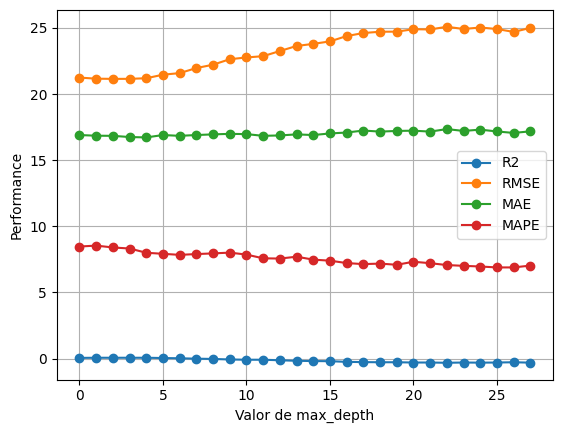

In [24]:
# Plot the results
i = range(len(r2_tree_list))

plt.plot(i, r2_tree_list, marker='o', linestyle='-', label='R2')
#plt.plot(i, mse_tree_list, marker='o', linestyle='-', label='MSE')
plt.plot(i, rmse_tree_list, marker='o', linestyle='-', label='RMSE')
plt.plot(i, mae_tree_list, marker='o', linestyle='-', label='MAE')
plt.plot(i, mape_tree_list, marker='o', linestyle='-', label='MAPE')

plt.xlabel('Valor de max_depth')
plt.ylabel('Performance')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
best_max_depth = 3

tree_reg = tr.DecisionTreeRegressor(max_depth= best_max_depth)
tree_reg.fit(X_train, y_train)
yhat = tree_reg.predict(X_val)

evaluate_model(y_val, yhat, r2_val, mse_val, rmse_val, mae_val, mape_val)

R2: 0.05
MSE: 451.34
RMSE: 21.24476406082214
MAE: 16.9
MAPE: 847.0000000000001


## Test

In [40]:
tree_reg = tr.DecisionTreeRegressor(max_depth=best_max_depth)
tree_reg.fit(X, y)
y_pred = tree_reg.predict(X_test)

evaluate_model(y_test, y_pred, r2_test, mse_test, rmse_test, mae_test, mape_test)


R2: 0.06
MSE: 459.9
RMSE: 21.44527920079382
MAE: 17.11
MAPE: 817.0


c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


# Random Forest Regression

## Train

In [ ]:
for i in range (3, 31, 1):
    rf_reg = RandomForestRegressor(max_depth=i)
    rf_reg.fit(X_train, y_train)

    y_pred = rf_reg.predict(X_train)

    r2 = mt.r2_score(y_train, y_pred).round(2)
    mse = mt.mean_squared_error(y_train, y_pred).round(2)
    rmse = np.sqrt(mse)
    mae = mt.mean_absolute_error(y_train, y_pred).round(2)
    mape = mt.mean_absolute_percentage_error(y_train, y_pred).round(2)

    print("Max depth: {}".format(i))
    print("R2: {}".format(r2))
    print("MSE: {}".format(mse))
    print("RMSE: {}".format(rmse))
    print("MAE: {}".format(mae))
    print("MAPE: {}\n".format(mape))

## Validation

In [27]:
for i in range (10, 31, 1):
    rf_reg = RandomForestRegressor(max_depth=i)
    rf_reg.fit(X_train, y_train)

    y_pred = rf_reg.predict(X_val)

    r2 = mt.r2_score(y_val, y_pred).round(2)
    mse = mt.mean_squared_error(y_val, y_pred).round(2)
    rmse = np.sqrt(mse)
    mae = mt.mean_absolute_error(y_val, y_pred).round(2)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred).round(2)

    print("Max depth: {}".format(i))
    print("R2: {}".format(r2))
    print("MSE: {}".format(mse))
    print("RMSE: {}".format(rmse))
    print("MAE: {}".format(mae))
    print("MAPE: {}\n".format(mape))

c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 10
R2: 0.21
MSE: 378.43
RMSE: 19.453277358841106
MAE: 15.34
MAPE: 7.85



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 11
R2: 0.23
MSE: 365.55
RMSE: 19.11936191403887
MAE: 15.01
MAPE: 7.73



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 12
R2: 0.26
MSE: 353.74
RMSE: 18.807977031036593
MAE: 14.71
MAPE: 7.64



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 13
R2: 0.28
MSE: 345.33
RMSE: 18.583056799138294
MAE: 14.4
MAPE: 7.54



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 14
R2: 0.29
MSE: 338.56
RMSE: 18.4
MAE: 14.15
MAPE: 7.43



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 15
R2: 0.31
MSE: 331.01
RMSE: 18.193680221439532
MAE: 13.88
MAPE: 7.31



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 16
R2: 0.32
MSE: 326.63
RMSE: 18.07290790105455
MAE: 13.65
MAPE: 7.23



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 17
R2: 0.32
MSE: 323.92
RMSE: 17.99777764058663
MAE: 13.5
MAPE: 7.19



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 18
R2: 0.33
MSE: 321.45
RMSE: 17.929026744360666
MAE: 13.37
MAPE: 7.11



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 19
R2: 0.33
MSE: 321.55
RMSE: 17.93181530130176
MAE: 13.28
MAPE: 7.13



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 20
R2: 0.33
MSE: 318.79
RMSE: 17.85469126028227
MAE: 13.15
MAPE: 7.08



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 21
R2: 0.33
MSE: 319.1
RMSE: 17.863370342687297
MAE: 13.12
MAPE: 7.09



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 22
R2: 0.33
MSE: 319.46
RMSE: 17.873443988218945
MAE: 13.09
MAPE: 7.1



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 23
R2: 0.33
MSE: 318.25
RMSE: 17.839562774911272
MAE: 13.04
MAPE: 7.02



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 24
R2: 0.33
MSE: 318.03
RMSE: 17.833395638520443
MAE: 13.04
MAPE: 7.05



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 25
R2: 0.33
MSE: 318.09
RMSE: 17.835077796297945
MAE: 13.06
MAPE: 7.03



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 26
R2: 0.34
MSE: 317.31
RMSE: 17.813197354770423
MAE: 13.02
MAPE: 7.04



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 27
R2: 0.33
MSE: 318.43
RMSE: 17.844607028455403
MAE: 13.04
MAPE: 7.01



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 28
R2: 0.33
MSE: 318.37
RMSE: 17.842925769054805
MAE: 13.05
MAPE: 7.02



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 29
R2: 0.33
MSE: 318.3
RMSE: 17.84096409950987
MAE: 13.02
MAPE: 7.04



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 30
R2: 0.33
MSE: 318.89
RMSE: 17.85749142516944
MAE: 13.04
MAPE: 7.02



## Test

In [28]:
best_max_depth = 26


rf_reg = RandomForestRegressor(max_depth=best_max_depth)
rf_reg.fit(X, y)

y_pred = rf_reg.predict(X_test)

r2 = mt.r2_score(y_test, y_pred).round(2)
mse = mt.mean_squared_error(y_test, y_pred).round(2)
rmse = np.sqrt(mse)
mae = mt.mean_absolute_error(y_test, y_pred).round(2)
mape = mt.mean_absolute_percentage_error(y_test, y_pred).round(2)

print("R2: {}".format(r2))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("MAE: {}".format(mae))
print("MAPE: {}\n".format(mape))

c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Max depth: 30
R2: 0.4
MSE: 292.25
RMSE: 17.09532099727876
MAE: 12.3
MAPE: 6.29



c:\Users\bruni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


# Polinomial Regression

## Train

In [ ]:
for i in range (1, 10):

    poly = pp.PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform( X_train.reshape(-1, 1) )

    # model training
    model = lm.LinearRegression()
    model.fit( X_poly, y_train )

    # predict
    y_pred = model.predict(X_poly)

    r2 = mt.r2_score(y_train, y_pred).round(2)
    mse = mt.mean_squared_error(y_train, y_pred).round(2)
    rmse = np.sqrt(mse)
    mae = mt.mean_absolute_error(y_train, y_pred).round(2)
    mape = mt.mean_absolute_percentage_error(y_train, y_pred).round(2)

    print("Max depth: {}".format(i))
    print("R2: {}".format(r2))
    print("MSE: {}".format(mse))
    print("RMSE: {}".format(rmse))
    print("MAE: {}".format(mae))
    print("MAPE: {}\n".format(mape))

In [ ]:
for i in range (10, 31, 1):
    rf_reg = RandomForestRegressor(max_depth=i)
    rf_reg.fit(X_train, y_train)

    y_pred = rf_reg.predict(X_val)

    r2 = mt.r2_score(y_val, y_pred).round(2)
    mse = mt.mean_squared_error(y_val, y_pred).round(2)
    rmse = np.sqrt(mse)
    mae = mt.mean_absolute_error(y_val, y_pred).round(2)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred).round(2)

    print("Max depth: {}".format(i))
    print("R2: {}".format(r2))
    print("MSE: {}".format(mse))
    print("RMSE: {}".format(rmse))
    print("MAE: {}".format(mae))
    print("MAPE: {}\n".format(mape))

## Validation

## Test